In [10]:
#Importing libraries
import pandas as pd             #Dataframe
import numpy as np              #Numeric analysis
%matplotlib inline

In [17]:
data = pd.read_csv("bank_data.csv", delimiter=";")
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [18]:
#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]
#data = data.iloc[:500,:]

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})
data.describe()

,age,balance,duration,y
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,0.115240
std,10.576211,3009.638142,259.856633,0.319347
min,19.000000,-3313.000000,4.000000,0.000000
25%,33.000000,69.000000,104.000000,0.000000
50%,39.000000,444.000000,185.000000,0.000000
75%,49.000000,1480.000000,329.000000,0.000000
max,87.000000,71188.000000,3025.000000,1.000000


In [19]:
#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

<IPython.core.display.Javascript object>

In [31]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
#model.fit(features,label)
model.fit(X_train, y_train)

#Predict Output
#predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
X_test = test[['age','balance','duration']]
y_test = test[['y']]

pred= model.predict(X_test) 
#print ("Predicted Value:", predicted)

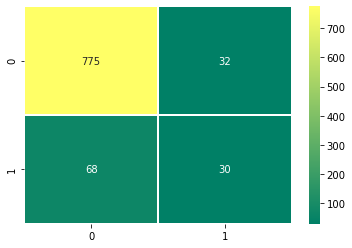

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8895027624309392


In [34]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred))

Precision: 0.4838709677419355
Recall: 0.30612244897959184


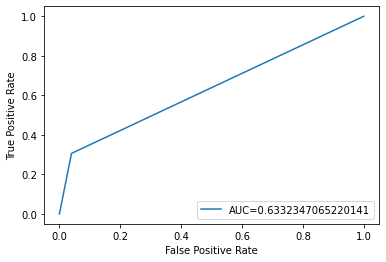

In [36]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred = model.predict(test[['age','balance','duration']])
fpr, tpr, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()